# Help & FAQs

If you run into technical issues feel free to raise an issue on github using the button at the top of this page.  
However, please keep in mind that we are *unable* to provide general statistical guidance via github issues. We recommend consulting the various resources available regarding multi-level models and the underlying [R packages](../api/rfuncs.md) that power `pymer4`. 

We try to keep the FAQ below updated for common questions and workflows

## Help my Kernel Crashes in Jupyter Notebooks/Lab!

Sometimes using `pymer4` interactively can cause the Python kernel to
crash. This is more likely to happen if you have multiple interactive
sessions running simulatenously. One way around this is to put this at
the top of your notebook/code:

``` python
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
```

Or set the following environment variable prior to launching your
interactive sessions:

``` bash
export KMP_DUPLICATE_LIB_OK=TRUE
```

## I'm confused about how to specify random-effects in LMMs/GLMMs

```python
# Random intercepts only
(1 | Group)

# Random slopes only
(0 + Variable | Group)

# Random intercepts and slopes (and their correlation)
(Variable | Group)

# Random intercepts and slopes (without their correlation)
(1 | Group) + (0 + Variable | Group)

# Same as above but will not separate factors (see: https://rdrr.io/cran/lme4/man/expandDoubleVerts.html)
(Variable || Group)

# Random intercept and slope for more than one variable (and their correlations)
(Variable_1 + Variable_2 | Group)

# Random intercepts, slopes, correlations for multiple random-effects
(Variable | Subject) + (Variable | Item)
```

## I want traditional ANOVA results and post-hoc tests

- Before using `.fit()` use `.set_factors('categorical_var')` to tell the model what your categorical predictors are
- Call `.anova()` which will automatically return correctly coded Type-III Sum-of-Squares omninbus $F$ tests
- You can explore "post-hoc" comparisons (marginal estiamtes and contrasts) using `.emmeans()` with `contrasts='pairwise'`

In [1]:
from pymer4.models import lm
from pymer4 import load_dataset

poker = load_dataset("poker")

In [2]:
model = lm('balance ~ hand * skill', data=poker)
model.set_factors(['hand', 'skill'])
model.anova(summary=True)

GT(_tbl_data=shape: (3, 6)
┌────────────┬─────┬───────┬─────────┬─────────┬───────┐
│ model term ┆ df1 ┆ df2   ┆ F_ratio ┆ p_value ┆ stars │
│ ---        ┆ --- ┆ ---   ┆ ---     ┆ ---     ┆ ---   │
│ str        ┆ f64 ┆ f64   ┆ f64     ┆ str     ┆ str   │
╞════════════╪═════╪═══════╪═════════╪═════════╪═══════╡
│ hand       ┆ 2.0 ┆ 294.0 ┆ 79.169  ┆ <.001   ┆ ***   │
│ skill      ┆ 1.0 ┆ 294.0 ┆ 2.434   ┆ 0.1198  ┆       │
│ hand:skill ┆ 2.0 ┆ 294.0 ┆ 7.083   ┆ <.001   ┆ ***   │
└────────────┴─────┴───────┴─────────┴─────────┴───────┘, _body=<great_tables._gt_data.Body object at 0x173129cd0>, _boxhead=Boxhead([ColInfo(var='model term', type=<ColInfoTypeEnum.default: 1>, column_label='model term', column_align='left', column_width=None), ColInfo(var='df1', type=<ColInfoTypeEnum.default: 1>, column_label='df1', column_align='right', column_width=None), ColInfo(var='df2', type=<ColInfoTypeEnum.default: 1>, column_label='df2', column_align='right', column_width=None), ColInfo(var='F_ratio', type=<ColInfoTypeEnum.default: 1>, column_label='F_ratio', column_align='right', column_width=None), ColInfo(var='p_value', type=<ColInfoTypeEnum.default: 1>, column_label='p_value', column_align='left', column_width=None), ColInfo(var='stars', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x173c4b020>, _spanners=Spanners([]), _heading=Heading(title='ANOVA (Type III tests)', subtitle=None, preheader=None), _stubhead=None, _source_notes=[Md(text='Signif. codes: *0 *** 0.001 ** 0.01 * 0.05 . 0.1*')], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x16a75ae40>, _formats=[<great_tables._gt_data.FormatInfo object at 0x3046201a0>, <great_tables._gt_data.FormatInfo object at 0x1731edac0>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom

Compare levels of `hand` at each level of `skill`

In [5]:
model.emmeans('hand', by='skill', contrasts='pairwise')

contrast,skill,estimate,SE,df,lower_CL,upper_CL,t_ratio,p_value
cat,cat,f64,f64,f64,f64,f64,f64,f64
"""bad - good""","""average""",-9.211,0.804093,294.0,-11.141963,-7.280037,-11.455148,0.0
"""bad - neutral""","""average""",-5.2572,0.804093,294.0,-7.188163,-3.326237,-6.538053,8.2552e-10
"""good - neutral""","""average""",3.9538,0.804093,294.0,2.022837,5.884763,4.917095,0.000004
"""bad - good""","""expert""",-4.9588,0.804093,294.0,-6.889763,-3.027837,-6.166951,6.8880e-9
"""bad - neutral""","""expert""",-3.553,0.804093,294.0,-5.483963,-1.622037,-4.418645,0.000042
"""good - neutral""","""expert""",1.4058,0.804093,294.0,-0.525163,3.336763,1.748306,0.225


Compare levels of `skill` at each level of `hand`

In [6]:
model.emmeans('skill', by='hand', contrasts='pairwise')

contrast,hand,estimate,SE,df,lower_CL,upper_CL,t_ratio,p_value
cat,cat,f64,f64,f64,f64,f64,f64,f64
"""average - expert""","""bad""",-2.7098,0.804093,294.0,-4.292307,-1.127293,-3.37001,0.000852
"""average - expert""","""good""",1.5424,0.804093,294.0,-0.040107,3.124907,1.918187,0.056056
"""average - expert""","""neutral""",-1.0056,0.804093,294.0,-2.588107,0.576907,-1.250602,0.212074


Perform pairwise comparisons between all combinations of `hand` and `skill`

In [10]:
# 15 comparisons just print the first 5
model.emmeans(['hand', 'skill'], contrasts='pairwise').head()

contrast,estimate,SE,df,lower_CL,upper_CL,t_ratio,p_value
str,f64,f64,f64,f64,f64,f64,f64
"""bad average - good average""",-9.211,0.804093,294.0,-11.584528,-6.837472,-11.455148,0.0
"""bad average - neutral average""",-5.2572,0.804093,294.0,-7.630728,-2.883672,-6.538053,4.1276e-9
"""bad average - bad expert""",-2.7098,0.804093,294.0,-5.083328,-0.336272,-3.37001,0.012705
"""bad average - good expert""",-7.6686,0.804093,294.0,-10.042128,-5.295072,-9.536961,0.0
"""bad average - neutral expert""",-6.2628,0.804093,294.0,-8.636328,-3.889272,-7.788655,1.7553e-12


## I want to perform an unequal-variances t-test

In situations when group sizes are different you may want to account for unequal variances. You can do this using the `weights` argument to a model.  

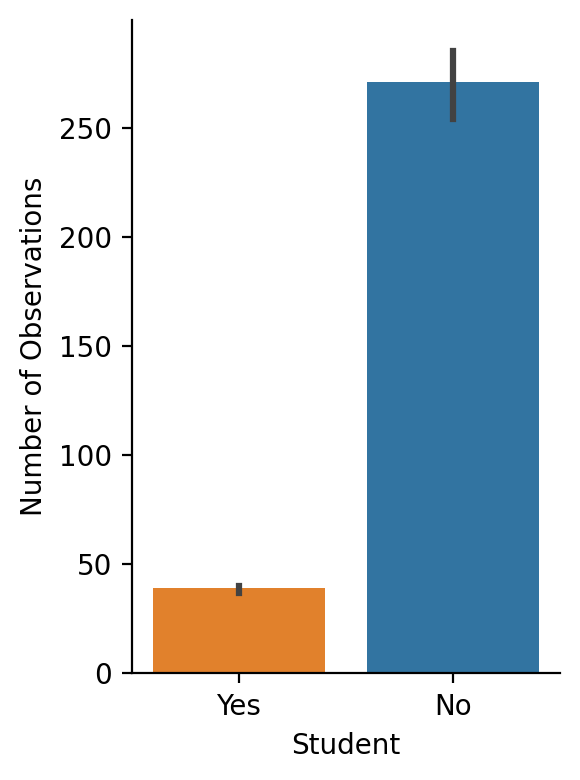

In [2]:
from pymer4.models import lm
from pymer4 import load_dataset
import seaborn as sns
import numpy as np
import polars as pl
from polars import col
from scipy.stats import ttest_ind

df = load_dataset("credit")

grid = sns.catplot(
    x="Student",
    y="Balance",
    kind="bar",
    hue="Student",
    order=["Yes", "No"],
    aspect=0.75,
    height=4,
    estimator=np.count_nonzero,
    data=df.to_pandas(),
)
grid.set_ylabels('Number of Observations');

We can do this in `scipy` using an unequal variance ("Welch's") t-test:

In [ ]:
student = df.filter(col('Student') == 'Yes').select('Balance')
non_student = df.filter(col('Student') == 'No').select('Balance')

# Regular independent samples t-test
results = ttest_ind(student, non_student)

# equal_var = False is the important part
welch_results = ttest_ind(student, non_student, equal_var=False)

print(f"t-test = {results.statistic[0]:.3f}")
print(f"Welch's t-test = {welch_results.statistic[0]:.3f}")

t-test = 5.350
Welch's t-test = 4.903


In regression terms this is a *weighted-least-squares* (WLS) model, where the weights are the inverse of each group's variance

In [6]:
# Create column called weights which is equal to 1 / var for each group
df = df.with_columns(
    pl.when(col("Student") == "No")
    .then(1 / non_student.var(ddof=1).item())
    .otherwise(1 / student.var(ddof=1).item())
    .alias('student_weights')
)

# Normal regression/t-test
ols = lm('Balance ~ Student', data=df)
ols.set_factors('Student')
ols.fit()

# Weighted regression/unequal var t-test
wls = lm('Balance ~ Student', weights='student_weights', data=df)
wls.set_factors('Student')
wls.fit()

In [9]:
print(f"OLS (t-test): {ols.result_fit[-1, 't_stat']:.3f}")
print(f"WLS (t-test): {wls.result_fit[-1, 't_stat']:.3f}")

OLS (t-test): 5.350
WLS (t-test): 4.903


## I know the R code. How do I do it in `pymer4`?

In general, you can use the `make_rfunc()` with a Python string as input to convert an R function to a Python function.  
Here's an example from a previous [github issue](https://github.com/ejolly/pymer4/issues/111) requesting the output of `VarCorr(mixed_model)`.  
While this information is available in the `.ranef_var` attribute of a model, here's how we can do it directly in R:

In [ ]:
from pymer4 import make_rfunc, load_dataset
from pymer4.models import lmer

# Load dataset and fit the model
sleep = load_dataset("sleep")
model = lmer("Reaction ~ Days + (Days | Subject)", data=sleep)
model.fit()

# Make a function that returns the coefficients of a model
varcorr = make_rfunc("""
function(model) {
output <- VarCorr(model, condVar=TRUE)
return(output)
}
""")

# Use the function passing in a model's .r_model attribute
out = varcorr(model.r_model)

Using the function will return an R data-type

In [ ]:
out

Subject,[14]


But you can use any of the functions in the [`pymer4.tidystats.bridge`](../api/tidystats.md#bridge) module to convert them to Python types.

The most general purpose of these is `to_dict()`

In [ ]:
import pymer4.tidystats as ts
ts.to_dict(out)

{'Subject': array([[612.10015806,   9.60440895],
        [  9.60440895,  35.07171445]])}

Since out is just a variance-covariance matrix we can use `R2numpy()` instead

In [ ]:
ts.R2numpy(out)

array([[[612.10015806,   9.60440895],
        [  9.60440895,  35.07171445]]])